In [1]:
!unzip cnn_dataset.zip -d ./

Streaming output truncated to the last 5000 lines.
 extracting: ./cnn_dataset/Y/17149.png  
 extracting: ./cnn_dataset/Y/1721.png  
 extracting: ./cnn_dataset/Y/17222.png  
 extracting: ./cnn_dataset/Y/17252.png  
 extracting: ./cnn_dataset/Y/17304.png  
 extracting: ./cnn_dataset/Y/17315.png  
 extracting: ./cnn_dataset/Y/17316.png  
 extracting: ./cnn_dataset/Y/17321.png  
 extracting: ./cnn_dataset/Y/17359.png  
 extracting: ./cnn_dataset/Y/17366.png  
 extracting: ./cnn_dataset/Y/17372.png  
 extracting: ./cnn_dataset/Y/17374.png  
 extracting: ./cnn_dataset/Y/1738.png  
 extracting: ./cnn_dataset/Y/17413.png  
 extracting: ./cnn_dataset/Y/17430.png  
 extracting: ./cnn_dataset/Y/17458.png  
 extracting: ./cnn_dataset/Y/17475.png  
 extracting: ./cnn_dataset/Y/17493.png  
 extracting: ./cnn_dataset/Y/17566.png  
 extracting: ./cnn_dataset/Y/17568.png  
 extracting: ./cnn_dataset/Y/17571 (2).png  
 extracting: ./cnn_dataset/Y/17571.png  
 extracting: ./cnn_dataset/Y/17575.png  
 ext

In [2]:
import torch
import torch.nn as nn
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [3]:

class VGG11CustomInput(nn.Module):
    def __init__(self, num_classes=36, input_size=(224,224)):
        super(VGG11CustomInput, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


model = VGG11CustomInput()
print(model)


VGG11CustomInput(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_

In [4]:
device=torch.device("cuda")

model.to(device)

VGG11CustomInput(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_

In [5]:
from torchvision import datasets
from torch.utils.data import random_split
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                               transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])




custom_dataset = datasets.ImageFolder(root="./cnn_dataset", transform=transform)
batch_size = 64


train_ds,testing_ds=random_split(custom_dataset,[int(0.8*len(custom_dataset)),int(0.2*len(custom_dataset))])
val_ds,test_ds=random_split(testing_ds,[int(0.5*len(testing_ds)),int(0.5*len(testing_ds))])

trainloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_ds, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_ds, batch_size=batch_size, shuffle=True)



In [6]:
import numpy as np
import time

training_accuracy = []
validation_accuracy = []
test_accuracy = []

training_loss = []
validation_loss = []
test_loss = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
start_time=time.time()
training_loss = []
training_loss_miniBatch = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loss=0.0
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs,labels=inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_loss+=loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:
            print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 200:.4f}")
            training_loss_miniBatch.append(running_loss / 200)
            running_loss = 0.0

    training_accuracy.append(100 * correct / total)
    training_loss.append(train_loss / len(trainloader))

    print("------validation-------")
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0

    with torch.no_grad():
        for data in valloader:

            images, labels = data
            images,labels=images.to(device),labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validation_accuracy.append(100 * correct / total)
    validation_loss.append(val_loss / len(valloader))

    # Testing accuracy and loss calculation (similar to validation but using the test dataset)
    correct = 0
    total = 0
    test_loss_val = 0.0

    print("------testing-------")
    with torch.no_grad():
        for data in testloader:

            images, labels = data
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss_val += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy.append(100 * correct / total)
    test_loss.append(test_loss_val / len(testloader))
    end_time=time.time()
    print("Completed Epoch:{0} - Training loss:{1},Testing loss:{2},Validation loss:{3}".format(epoch+1,training_loss[-1],test_loss[-1],validation_loss[-1]))


Epoch 1, Batch 200, Loss: 3.5836
Epoch 1, Batch 400, Loss: 3.5835
Epoch 1, Batch 600, Loss: 3.5837
Epoch 1, Batch 800, Loss: 3.5837
Epoch 1, Batch 1000, Loss: 3.5836
Epoch 1, Batch 1200, Loss: 3.5836
------validation-------
------testing-------
Completed Epoch:1 - Training loss:3.5836147402960155,Testing loss:3.5836417614659175,Validation loss:3.5836355052416837
Epoch 2, Batch 200, Loss: 3.5835
Epoch 2, Batch 400, Loss: 3.5835
Epoch 2, Batch 600, Loss: 3.5836
Epoch 2, Batch 800, Loss: 3.5834
Epoch 2, Batch 1000, Loss: 3.5837
Epoch 2, Batch 1200, Loss: 3.5836
------validation-------
------testing-------
Completed Epoch:2 - Training loss:3.583545971105969,Testing loss:3.5836718248415598,Validation loss:3.583643047115471
Epoch 3, Batch 200, Loss: 3.5835
Epoch 3, Batch 400, Loss: 3.5834
Epoch 3, Batch 600, Loss: 3.5833
Epoch 3, Batch 800, Loss: 3.5837
Epoch 3, Batch 1000, Loss: 3.5835
Epoch 3, Batch 1200, Loss: 3.5834
------validation-------
------testing-------
Completed Epoch:3 - Trainin

In [4]:
print('Total training time for 10 epochs:{0:.2f}s'.format(end_time-start_time))

Total training time for 10 epochs:7459.85s


In [7]:
val_loss

49.14257696270943

In [8]:
test_accuracy

[2.7182539682539684,
 2.4107142857142856,
 2.4107142857142856,
 2.4107142857142856,
 17.251984126984127,
 80.9920634920635,
 85.7936507936508,
 87.00396825396825,
 87.20238095238095,
 88.05555555555556]

In [9]:
training_accuracy

[2.6438492063492065,
 2.765376984126984,
 2.8521825396825395,
 3.0394345238095237,
 4.946676587301587,
 58.39781746031746,
 80.5047123015873,
 84.59449404761905,
 86.3702876984127,
 87.43303571428571]

In [10]:
print(validation_accuracy)

[2.757936507936508, 2.619047619047619, 2.619047619047619, 2.619047619047619, 16.438492063492063, 81.01190476190476, 85.86309523809524, 87.00396825396825, 87.41071428571429, 88.44246031746032]


In [12]:
# Save model
torch.save(model.state_dict(), "gsubrama_ksoundap_assignment2_part4.pth")
print("Trained model saved.")

Trained model saved.


In [13]:
#load model
model = VGG11CustomInput()
model.load_state_dict(torch.load("gsubrama_ksoundap_assignment2_part4.pth"))
model.eval()

VGG11CustomInput(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_

In [39]:
import numpy as np
import time
from sklearn.metrics import precision_recall_fscore_support
import torch
import torch.nn as nn
import torch.optim as optim
model=model.to(device)
model.eval()
true_labels = []
predicted_labels = []
probs=[]
with torch.no_grad():
  for data in testloader:
      inputs, labels = data
      inputs,labels=inputs.to(device),labels.to(device)
      outputs = model(inputs)
      probs.extend(outputs.cpu().numpy())
      _, predicted = torch.max(outputs, 1)

      true_labels.extend(labels.tolist())
      predicted_labels.extend(predicted.tolist())

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.884896319326304
Recall: 0.8824404761904762
F1 Score: 0.8826508364262361


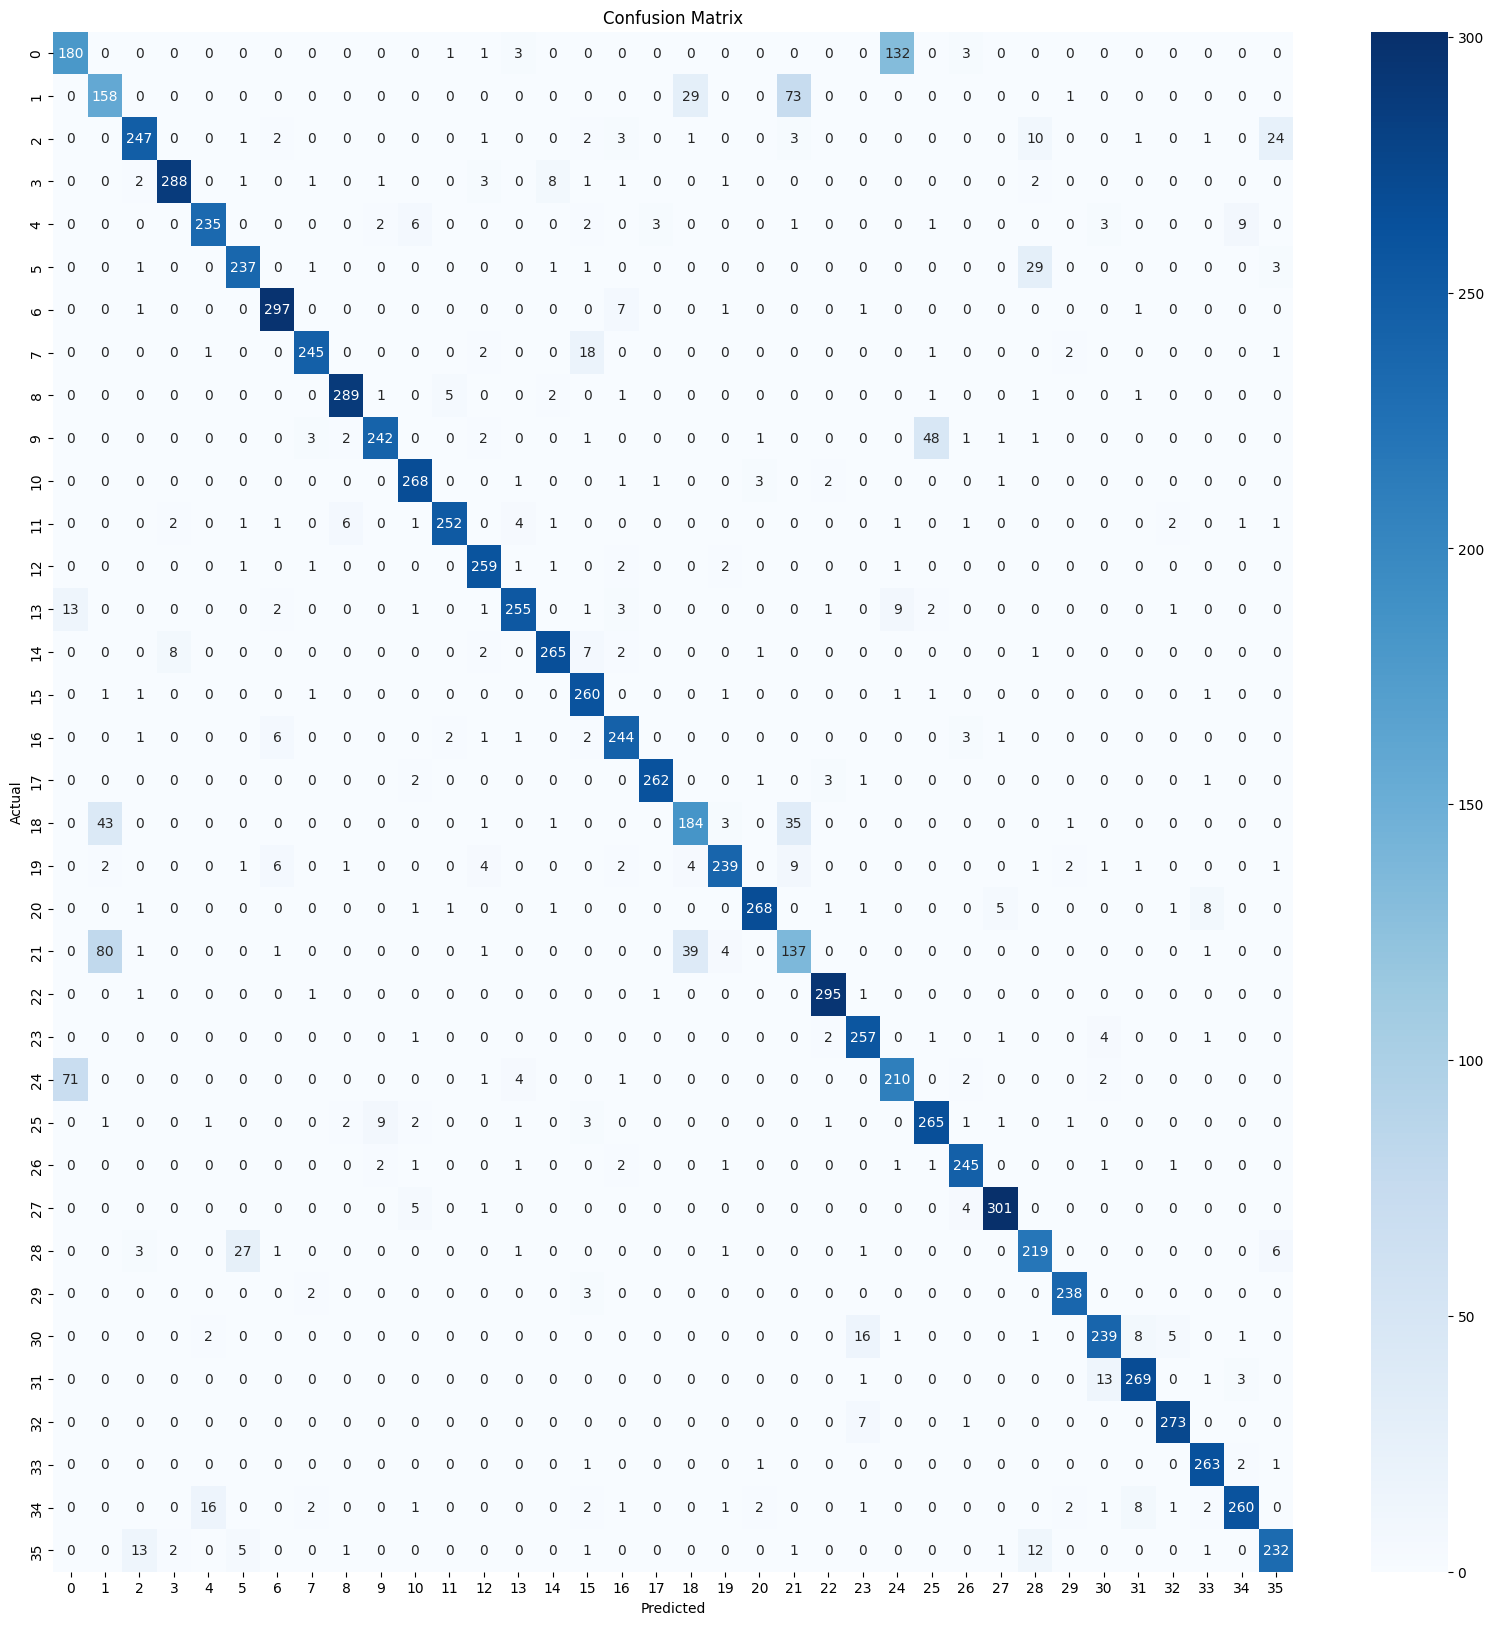

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(20,20))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
probs=np.array(probs)

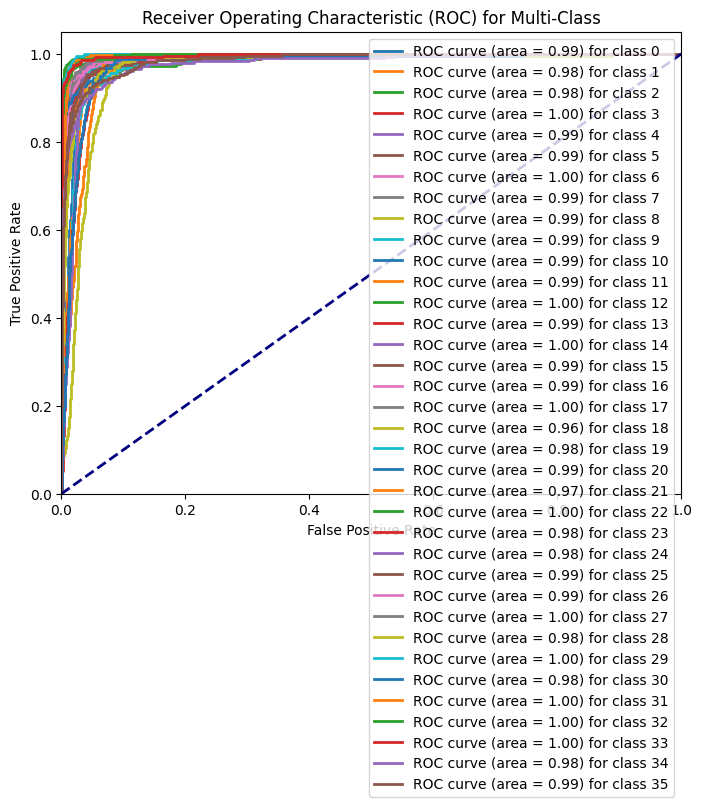

In [49]:
# Calculate and plot the ROC curve for each class
from sklearn.metrics import roc_curve, auc
n_classes = len(set(true_labels))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    true_labels_i = [1 if label == i else 0 for label in true_labels]
    probs_i = [prob[i] for prob in probs]

    fpr[i], tpr[i], _ = roc_curve(true_labels_i, probs_i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc='best')
plt.show()

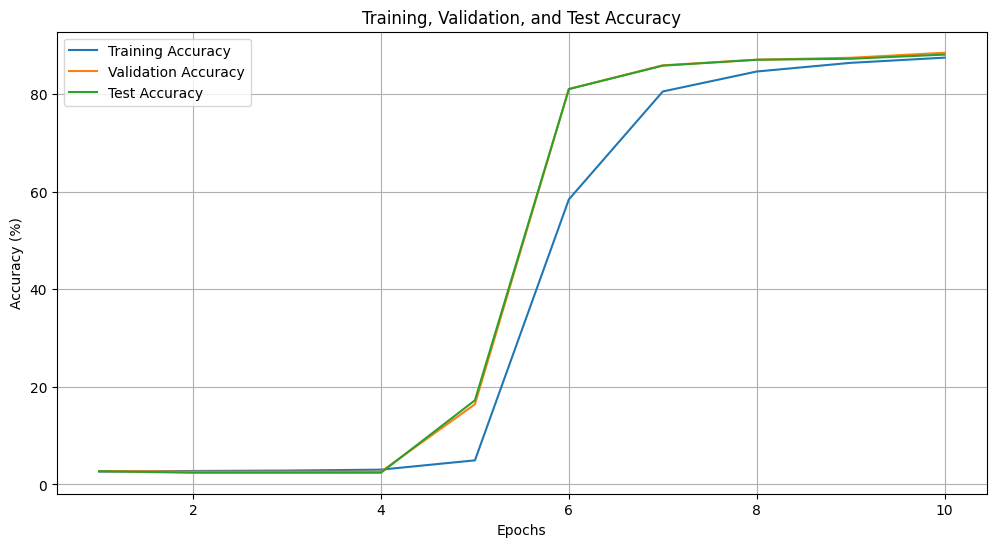

In [32]:
import matplotlib.pyplot as plt

# Plot training, validation, and test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), validation_accuracy, label='Validation Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


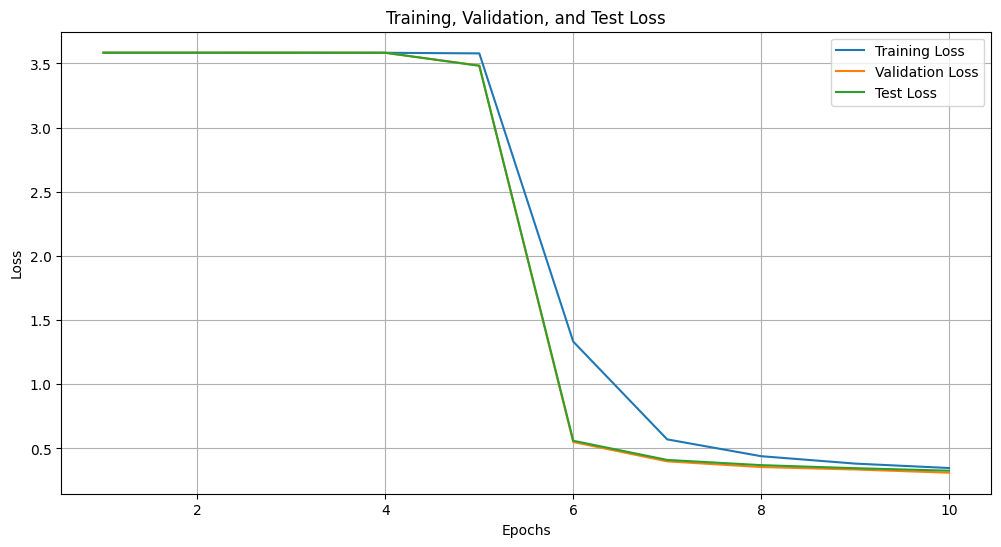

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_loss, label='Validation Loss')
plt.plot(range(1, num_epochs + 1), test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.grid(True)
plt.show()